In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [68]:
img = cv2.imread('sad.jpg')

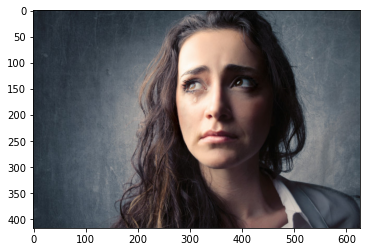

In [69]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [70]:
prediction = DeepFace.analyze(img,enforce_detection=False,actions=['emotion'])

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


In [71]:
#prediction['dominant_emotion']
prediction

{'emotion': {'angry': 4.570108652114868,
  'disgust': 2.7571309124674315e-08,
  'fear': 40.48371613025665,
  'happy': 6.1924056160567176e-09,
  'sad': 53.11685800552368,
  'surprise': 3.962514205646528e-08,
  'neutral': 1.8293200060725212},
 'dominant_emotion': 'sad',
 'age': 30,
 'gender': 'Woman',
 'race': {'asian': 0.03285707403240049,
  'indian': 0.12013713846800557,
  'black': 0.002293928037338326,
  'white': 76.96219545377465,
  'middle eastern': 11.427643831231823,
  'latino hispanic': 11.454874959878621},
 'dominant_race': 'white'}

In [72]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [73]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = facecascade.detectMultiScale(gray,1.1,4)

# Draw a rectangle around face
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(234,255,198),2)

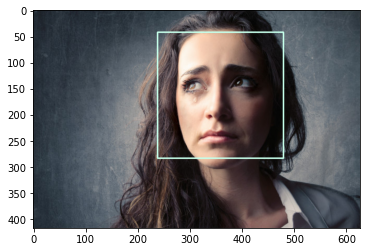

In [74]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [75]:
font = cv2.FONT_HERSHEY_SIMPLEX
# use puText() method for putting text on vide
cv2.putText(img,prediction['dominant_emotion'],(0,50),font,1,(245,202,175),2,cv2.LINE_4)
#cv2.putText(img,prediction['gender'],(250,250),font,1,(215,242,235),2,cv2.LINE_4)

array([[[58, 53, 44],
        [43, 37, 30],
        [27, 20, 17],
        ...,
        [70, 63, 54],
        [70, 63, 54],
        [70, 63, 54]],

       [[61, 54, 45],
        [55, 47, 40],
        [46, 37, 33],
        ...,
        [70, 63, 54],
        [69, 62, 53],
        [70, 63, 54]],

       [[52, 46, 35],
        [55, 48, 39],
        [59, 49, 42],
        ...,
        [68, 61, 52],
        [66, 59, 50],
        [66, 59, 50]],

       ...,

       [[60, 51, 41],
        [54, 45, 35],
        [54, 45, 35],
        ...,
        [33, 26, 29],
        [35, 29, 30],
        [34, 28, 29]],

       [[60, 51, 41],
        [56, 47, 37],
        [56, 47, 37],
        ...,
        [30, 25, 27],
        [33, 28, 29],
        [33, 28, 29]],

       [[66, 56, 46],
        [61, 51, 41],
        [55, 45, 35],
        ...,
        [29, 24, 26],
        [32, 25, 28],
        [37, 31, 32]]], dtype=uint8)

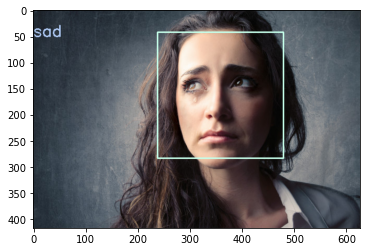

In [76]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [83]:
import cv2
from deepface import DeepFace
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(1)
while True:
    ret,frame = cap.read()
    result=DeepFace.analyze(frame,enforce_detection=False,actions=['emotion'])
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray,1.1,4)

# Draw a rectangle around face
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(234,255,198),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    # use puText() method for putting text on vide
    cv2.putText(frame,prediction['dominant_emotion'],(50,50),font,3,(245,202,175),2,cv2.LINE_4)
    cv2.imshow('Original Video',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]
